In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [ ]:
ls

 Clustering.ipynb
 Forecasting.ipynb
'linear reg.gsheet'
'Logistic .ipynb'
'Major Project.ipynb'
'Multi class classification.ipynb'
'Multilinear reg .ipynb'
'Naman Tiwari(Minor Project) python sept batch.ipynb'
 NLP.ipynb
 Restaurant_Reviews.csv
'simple Linear reg.ipynb'


#Sentiment Analysis

**Processing The Data**

In [ ]:
df = pd.read_table('/content/drive/MyDrive/ML/Restaurant_Reviews.csv')

In [ ]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.shape

(1000, 2)

**Visual**

1    500
0    500
Name: Liked, dtype: int64

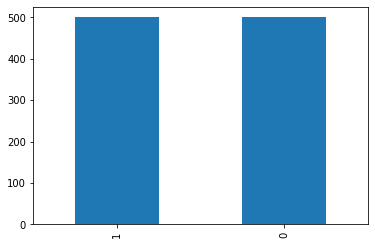

In [ ]:
df['Liked'].value_counts().plot(kind='bar')
df['Liked'].value_counts()

In [ ]:
df['Review'][500]

"I also had to taste my Mom's multi-grain pumpkin pancakes with pecan butter and they were amazing, fluffy, and delicious!"

In [ ]:
df['Review'][999]

"Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check."

**Initializing input(x) and output(y)**

In [ ]:
x= df['Review'].values
y= df['Liked'].values

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(750,)

In [ ]:
x_test.shape

(250,)

**Importing CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer(stop_words ='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

 **Implementing SVMs and CountVectorizers to make a pipeline**

In [ ]:
from sklearn.svm import SVC      
model = SVC() 

In [ ]:
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(CountVectorizer(),SVC())

text_model.fit(x_train,y_train)

y_pred = text_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

**Accuracy score**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.792

**validating the model**

In [ ]:
df['Review'][225]

'I loved the bacon wrapped dates.'

In [ ]:
df['Liked'][225]

1

In [ ]:
text_model.predict([df['Review'][225]])

array([1])

In [ ]:
text_model.predict(['Very Bad Food'])

array([0])

**creating joblib for the model**

In [ ]:
import joblib  
joblib.dump(text_model,'sentiment')

['sentiment']

In [ ]:
import joblib   
text_model = joblib.load('sentiment')

# App for Sentiment Analysis

In [ ]:
import joblib   
text_model = joblib.load('sentiment')

In [ ]:
!pip install streamlit --quiet 

     |████████████████████████████████| 8.3 MB 4.2 MB/s 
     |████████████████████████████████| 180 kB 56.2 MB/s 
     |████████████████████████████████| 76 kB 4.9 MB/s 
     |████████████████████████████████| 111 kB 77.6 MB/s 
     |████████████████████████████████| 4.3 MB 40.7 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 125 kB 59.2 MB/s 
     |████████████████████████████████| 790 kB 49.8 MB/s 
     |████████████████████████████████| 374 kB 57.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.22 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.5.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.29.0 which is incompatibl

In [ ]:
!pip install pyngrok==4.1.1

  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15984 sha256=bec17d78d13c62d5cfa9a3a6f3f4e0b0f975940905f1ab3861855b7551abb0d3
  Stored in directory: /root/.cache/pip/wheels/b1/d9/12/045a042fee3127dc40ba6f5df2798aa2df38c414bf533ca765
Successfully built pyngrok


In [ ]:
from pyngrok import ngrok

In [ ]:
%%writefile app.py 
import streamlit as st
import joblib 
st.title("Sentiment Analysis")
text_model = joblib.load('sentiment')
ip = st.text_input('Enter your review:')
op = text_model.predict([ip])
if st.button('Liked?'):
  st.title(op[0])

Writing app.py


In [ ]:
!nohup streamlit run app.py & 
url = ngrok.connect(port = '8501')
url

nohup: appending output to 'nohup.out'


'http://b837-35-201-195-36.ngrok.io'